# Part 1: Using wget

In [1]:
import requests

download_path = "data_downloadable"

def download_from_url(url, file_name):
    with requests.get(url, stream=True) as r:
        with open(f"{download_path}/{file_name}", "wb") as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
    print(f"{file_name} download complete")


In [2]:
# download the data from a URL
# source: https://archive.ics.uci.edu/ml/datasets/Arrhythmia
# alternate URL: https://lazyprogrammer.me/course_files/arrhythmia.data
# !wget --no-check-certificate https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data
# !wget https://lazyprogrammer.me/course_files/arrhythmia.data
url = "https://lazyprogrammer.me/course_files/arrhythmia.data"

download_from_url(url, "arrhythmia.data")

arrhythmia.data download complete


In [3]:
# check the data
import pandas as pd

df = pd.read_csv(f'{download_path}/arrhythmia.data', header=None)

In [4]:
# since the data has many columns, take just the first few and name them (as per the documentation)
data = df[[0,1,2,3,4,5]]
data.columns = ['age', 'sex', 'height', 'weight', 'QRS duration', 'P-R interval']

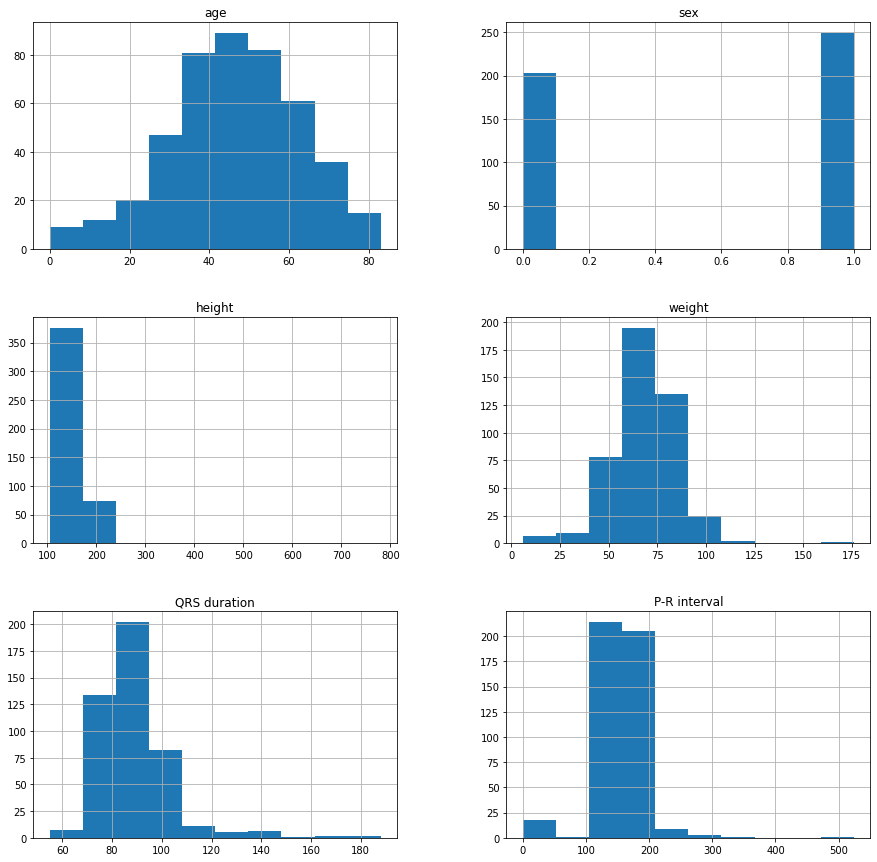

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15] # make the plot bigger so the subplots don't overlap
data.hist(); # use a semicolon to supress return value

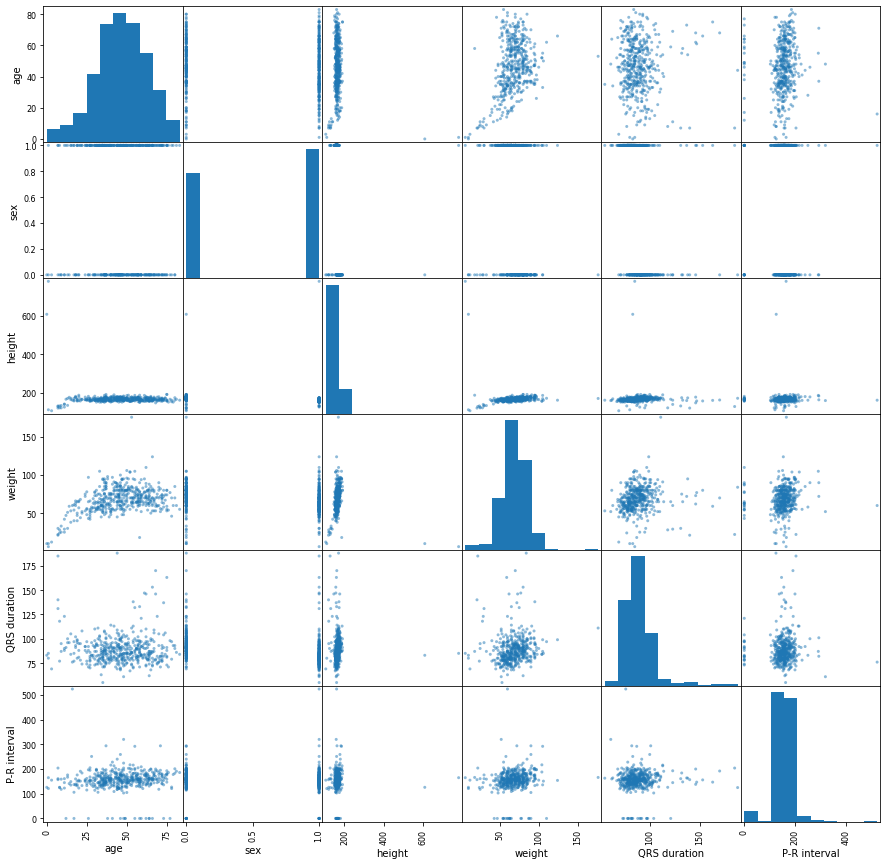

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(data);

# Part 2: Using tf.keras

In [7]:
# use keras get_file to download the auto MPG dataset
# source: https://archive.ics.uci.edu/ml/datasets/Auto+MPG
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

### alternate URL
url = 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/auto-mpg.data'


In [9]:
# Install TensorFlow

import tensorflow as tf
print(tf.__version__)

2.7.0


In [14]:
# check out the documentation for other arguments
file_path = tf.keras.utils.get_file('auto-mpg.data', url)
file_path

'C:\\Users\\Dell\\.keras\\datasets\\auto-mpg.data'

In [15]:
# unless you specify an alternative path, the data will go into /root/.keras/datasets/
df = pd.read_csv(file_path, header=None, delim_whitespace=True)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [17]:
# open the file
# the last few lines are junk
df = pd.read_csv('data/daily-minimum-temperatures-in-me.csv', error_bad_lines=False)
df.head()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
